In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read CSV file
mydata = pd.read_csv("ames_housing_data.csv")

# Print the structure of the data
print(mydata.info())
print(mydata.head())
print(mydata.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SID            2930 non-null   int64  
 1   PID            2930 non-null   int64  
 2   SubClass       2930 non-null   int64  
 3   Zoning         2930 non-null   object 
 4   LotFrontage    2440 non-null   float64
 5   LotArea        2930 non-null   int64  
 6   Street         2930 non-null   object 
 7   Alley          198 non-null    object 
 8   LotShape       2930 non-null   object 
 9   LandContour    2930 non-null   object 
 10  Utilities      2930 non-null   object 
 11  LotConfig      2930 non-null   object 
 12  LandSlope      2930 non-null   object 
 13  Neighborhood   2930 non-null   object 
 14  Condition1     2930 non-null   object 
 15  Condition2     2930 non-null   object 
 16  BldgType       2930 non-null   object 
 17  HouseStyle     2930 non-null   object 
 18  OverallQ

In [2]:
# Create new variables
mydata['TotalFloorSF'] = mydata['FirstFlrSF'] + mydata['SecondFlrSF']
mydata['HouseAge'] = mydata['YrSold'] - mydata['YearBuilt']
mydata['QualityIndex'] = mydata['OverallQual'] * mydata['OverallCond']
mydata['logSalePrice'] = np.log(mydata['SalePrice'])
mydata['price_sqft'] = mydata['SalePrice'] / mydata['TotalFloorSF']

# Print summary of price_sqft
print(mydata['price_sqft'].describe())

count    2930.000000
mean      121.595174
std        31.893333
min        15.371394
25%       100.573697
50%       120.429633
75%       140.009301
max       276.250881
Name: price_sqft, dtype: float64


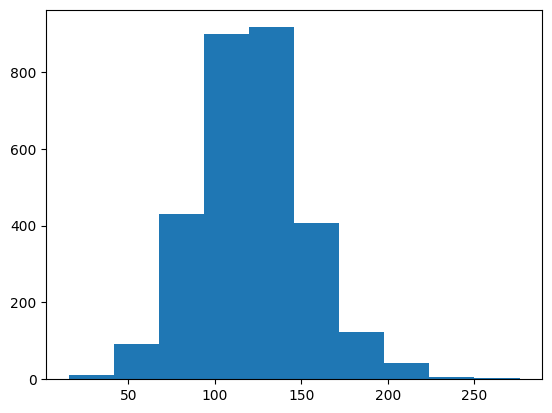

In [3]:
# Plot histogram of price_sqft
plt.hist(mydata['price_sqft'])
plt.show()


In [4]:
# Select subset of data
subdat = mydata[["TotalFloorSF", "HouseAge", "QualityIndex", "price_sqft", 
                 "SalePrice", "LotArea", "BsmtFinSF1", "Neighborhood", 
                 "HouseStyle", "LotShape", "OverallQual", "logSalePrice", 
                 "TotalBsmtSF", "HouseStyle"]]

print(subdat.info())

subdatnum = mydata[["TotalFloorSF", "HouseAge", "QualityIndex", 
                    "SalePrice", "LotArea", "OverallQual", "logSalePrice"]]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalFloorSF  2930 non-null   int64  
 1   HouseAge      2930 non-null   int64  
 2   QualityIndex  2930 non-null   int64  
 3   price_sqft    2930 non-null   float64
 4   SalePrice     2930 non-null   int64  
 5   LotArea       2930 non-null   int64  
 6   BsmtFinSF1    2929 non-null   float64
 7   Neighborhood  2930 non-null   object 
 8   HouseStyle    2930 non-null   object 
 9   LotShape      2930 non-null   object 
 10  OverallQual   2930 non-null   int64  
 11  logSalePrice  2930 non-null   float64
 12  TotalBsmtSF   2929 non-null   float64
 13  HouseStyle    2930 non-null   object 
dtypes: float64(4), int64(6), object(4)
memory usage: 320.6+ KB
None


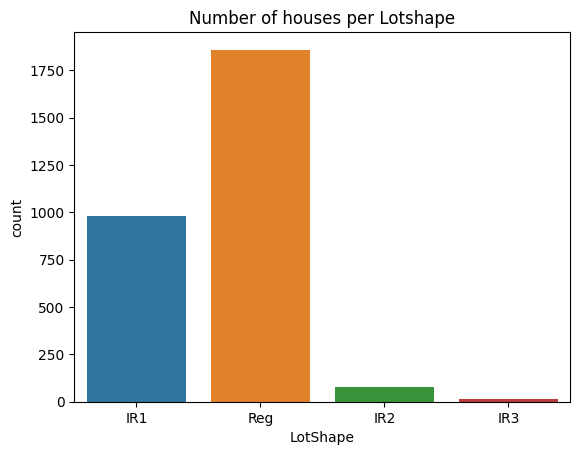

In [5]:
# Univariate EDA
sns.countplot(data=subdat, x='LotShape').set_title('Number of houses per Lotshape')
plt.show()

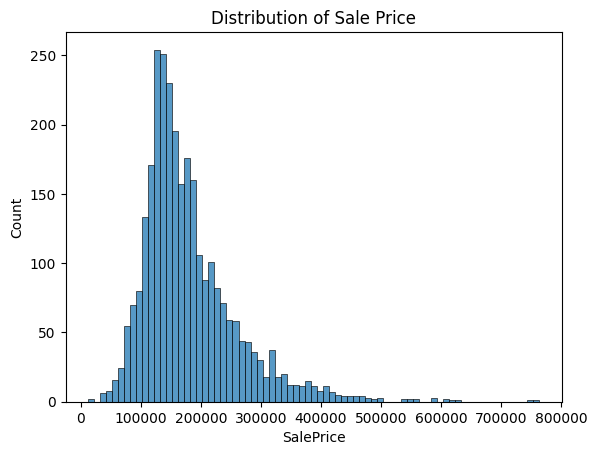

In [6]:
sns.histplot(data=subdat, x='SalePrice', binwidth=10000).set_title('Distribution of Sale Price')
plt.show()

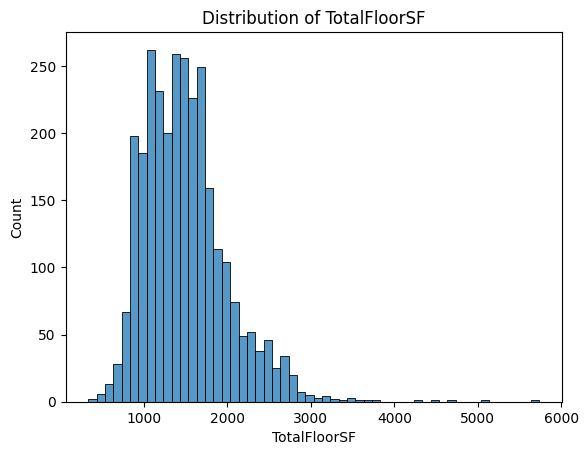

In [7]:
sns.histplot(data=subdat, x='TotalFloorSF', binwidth=100).set_title('Distribution of TotalFloorSF')
plt.show()

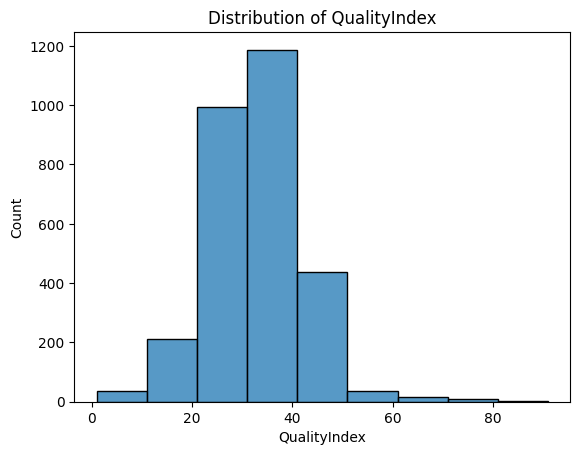

In [8]:
sns.histplot(data=subdat, x='QualityIndex', binwidth=10).set_title('Distribution of QualityIndex')
plt.show()


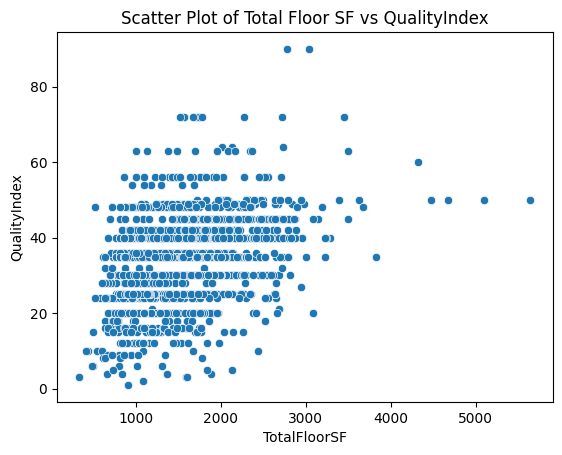

In [9]:
# Bivariate EDA
sns.scatterplot(data=subdat, x='TotalFloorSF', y='QualityIndex').set_title('Scatter Plot of Total Floor SF vs QualityIndex')
plt.show()


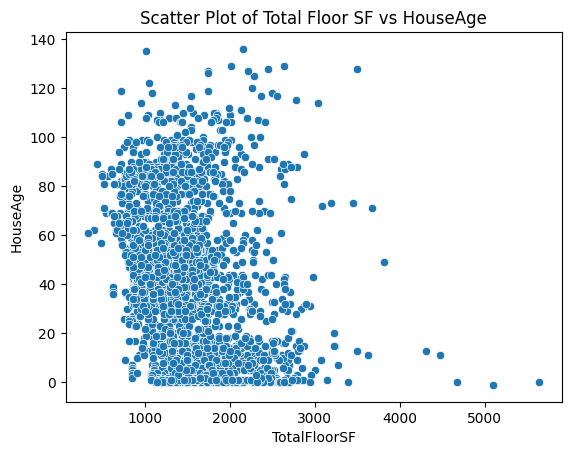

In [10]:
sns.scatterplot(data=subdat, x='TotalFloorSF', y='HouseAge').set_title('Scatter Plot of Total Floor SF vs HouseAge')
plt.show()


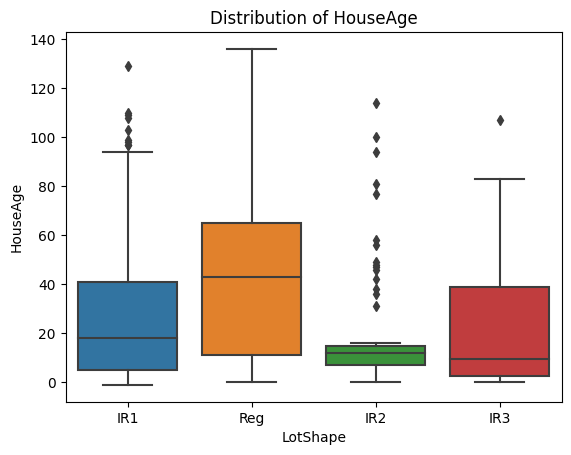

In [11]:
sns.boxplot(data=subdat, x='LotShape', y='HouseAge').set_title('Distribution of HouseAge')
plt.show()


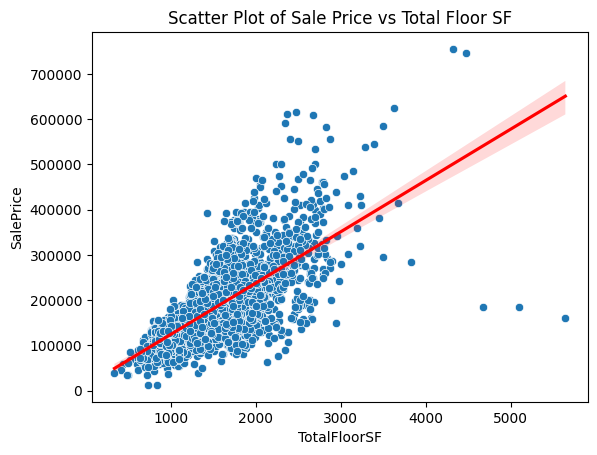

In [12]:
# Model focussed EDA
sns.scatterplot(data=subdat, x='TotalFloorSF', y='SalePrice').set_title('Scatter Plot of Sale Price vs Total Floor SF')
sns.regplot(data=subdat, x='TotalFloorSF', y='SalePrice', scatter=False, color='red')
plt.show()


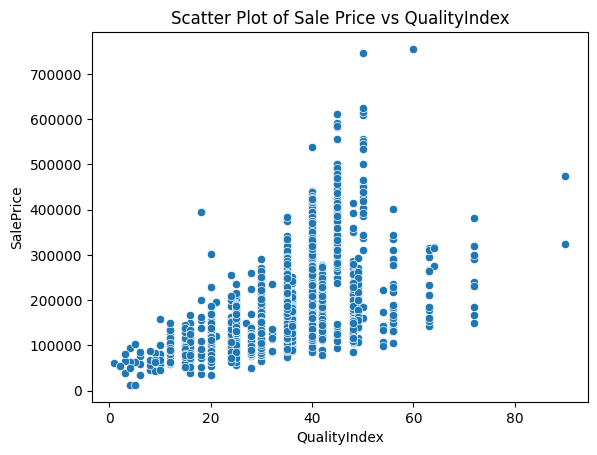

In [13]:
sns.scatterplot(data=subdat, x='QualityIndex', y='SalePrice').set_title('Scatter Plot of Sale Price vs QualityIndex')
plt.show()


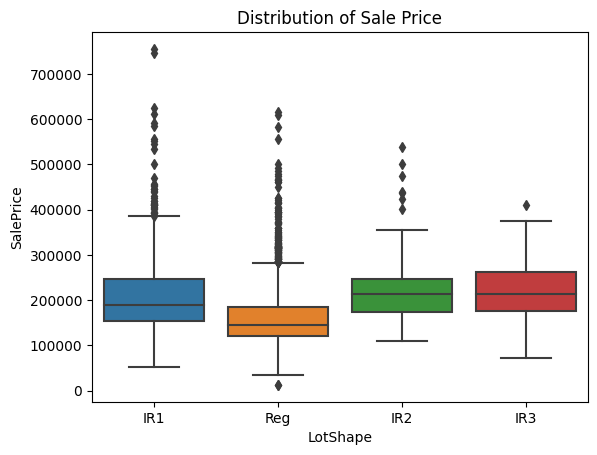

In [14]:
sns.boxplot(data=subdat, x='LotShape', y='SalePrice').set_title('Distribution of Sale Price')
plt.show()


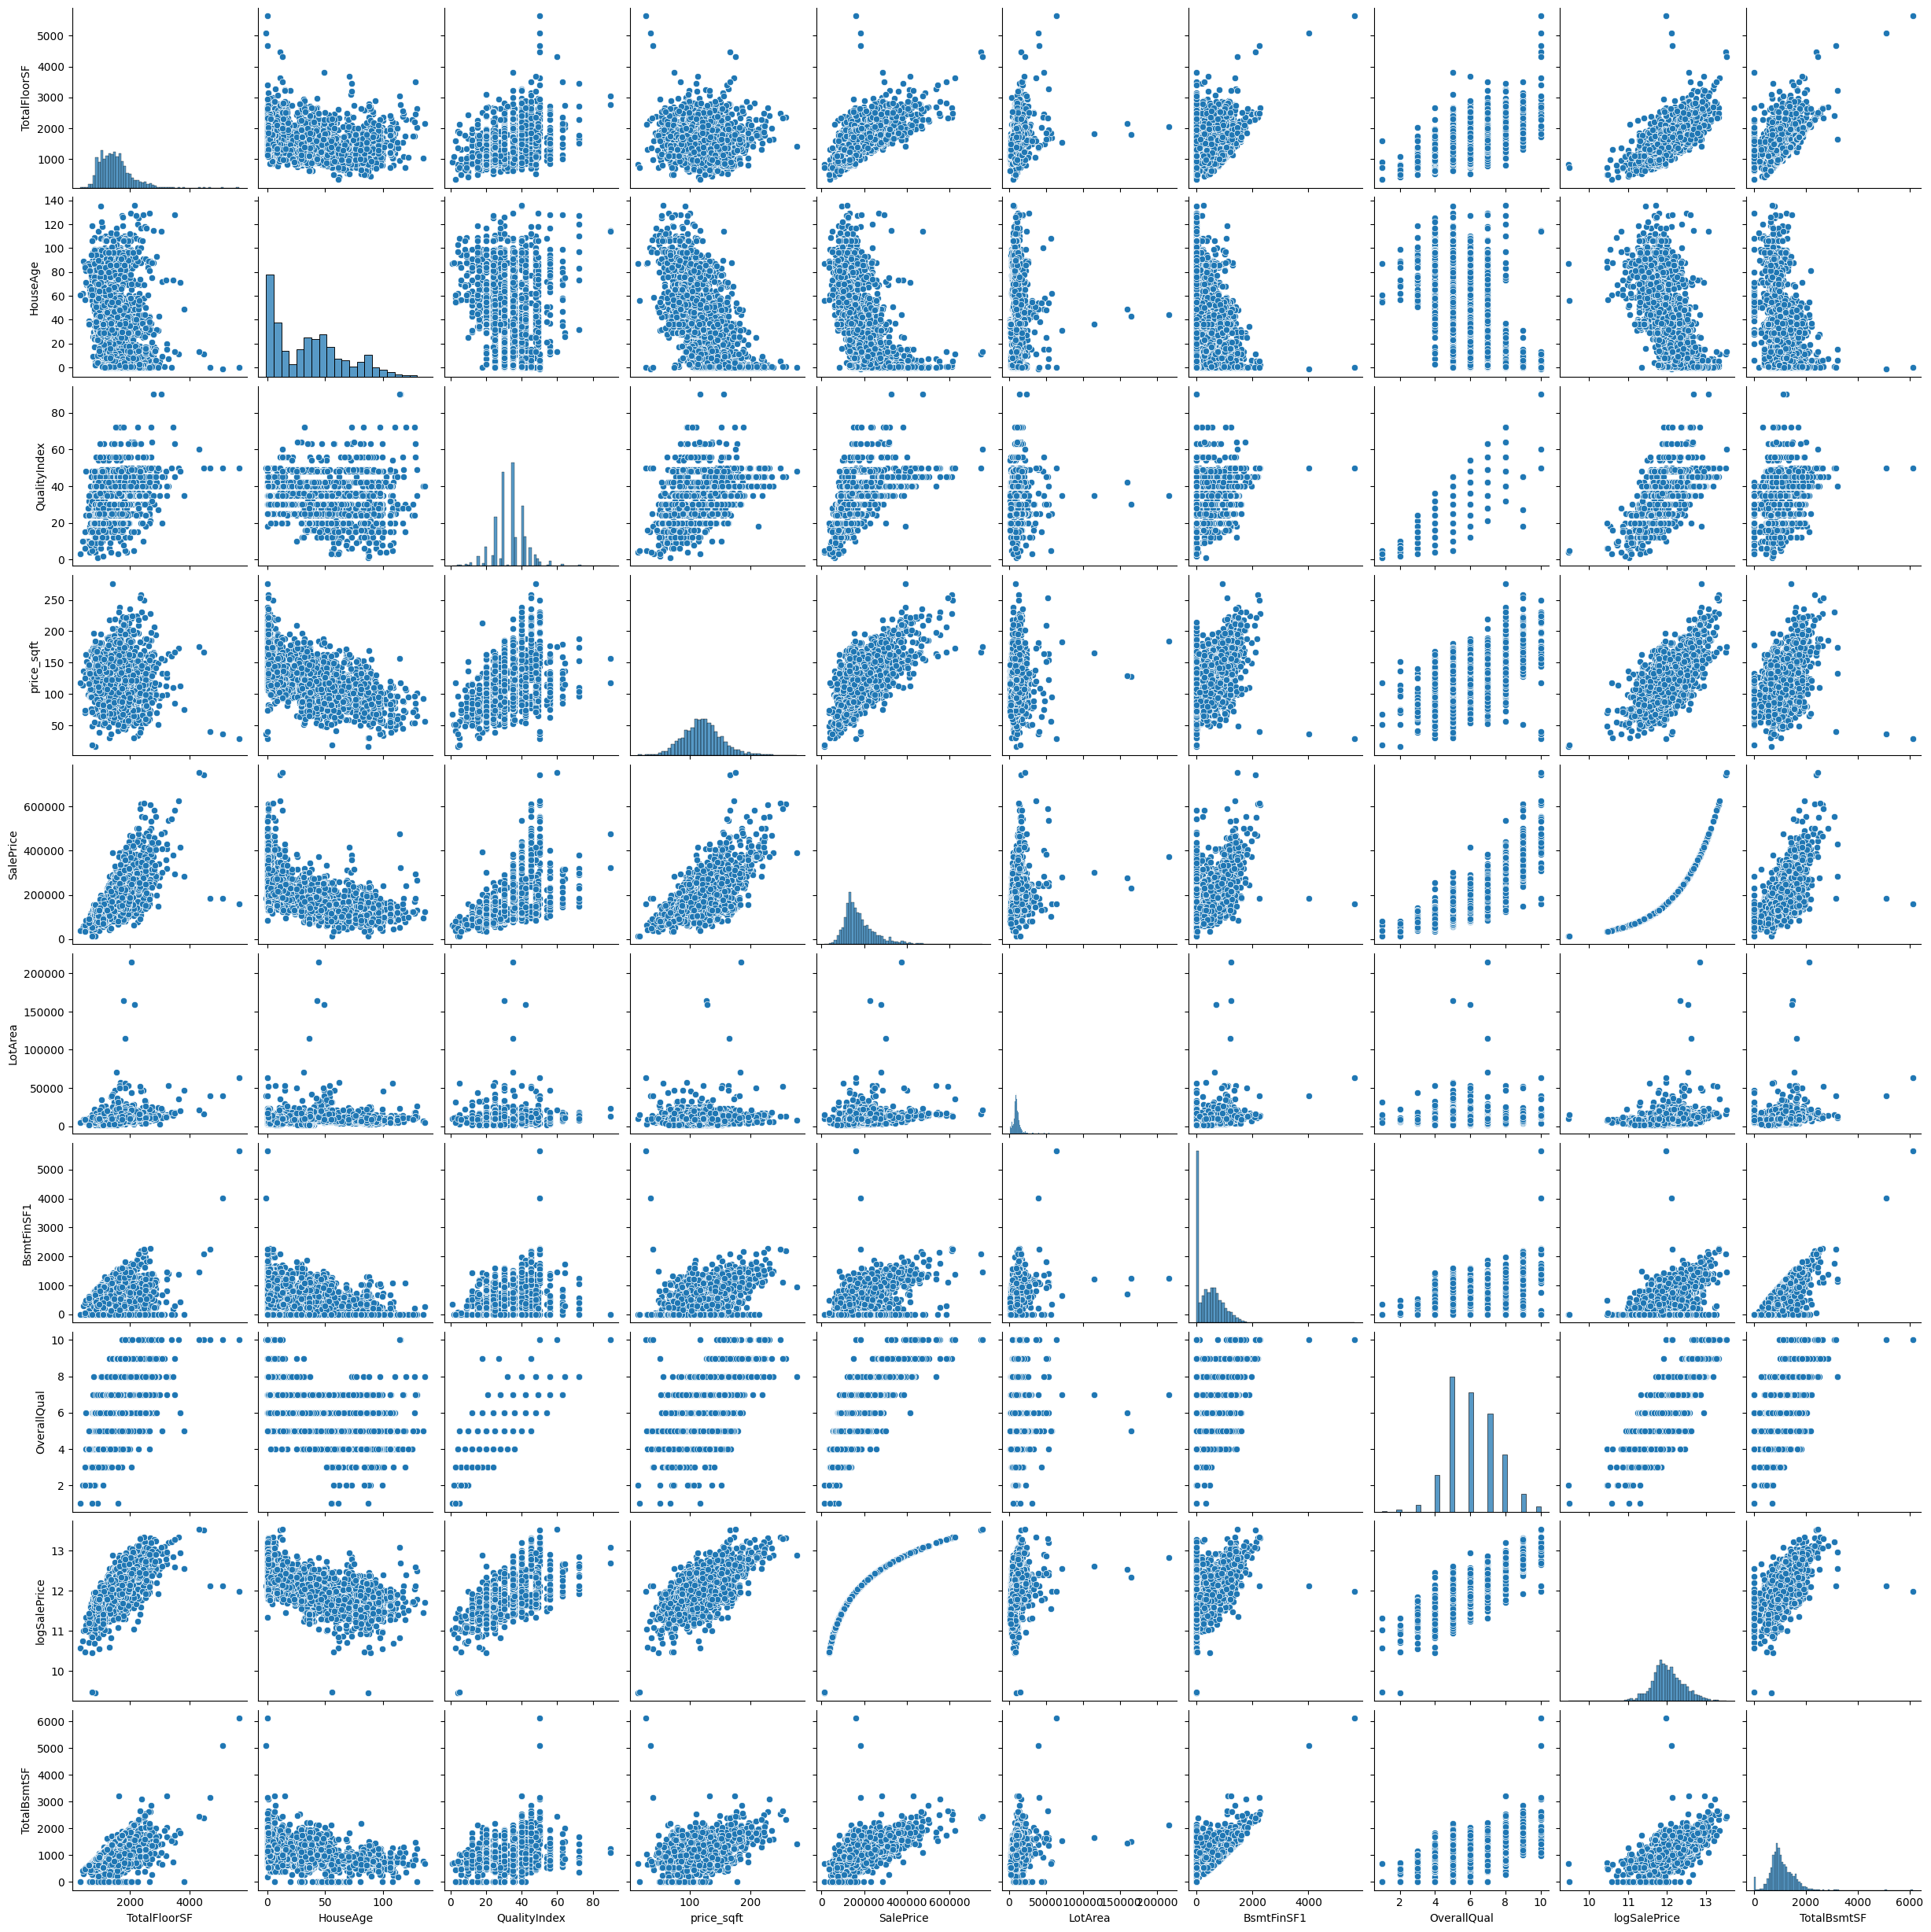

In [17]:
subdat_numeric = subdat.select_dtypes(include=np.number)
sns.pairplot(subdat_numeric)
plt.show()

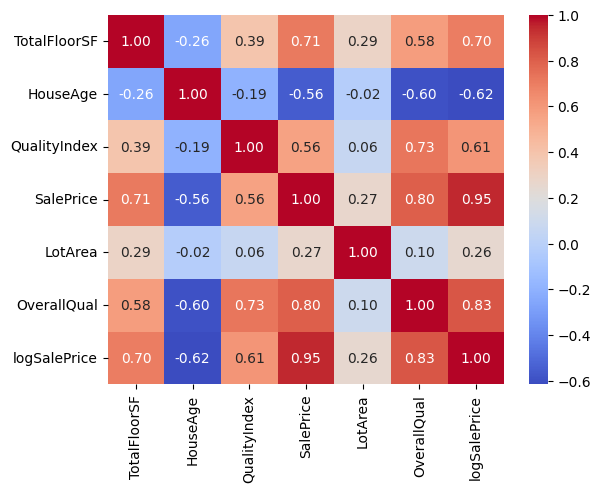

In [16]:
# Correlation plot
corr = subdatnum.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()
